In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Union

In [24]:
def get_all_files(folder):
    file_list = []
    if os.path.exists(folder):
        for root, dirs, files in os.walk(folder):
            for file in files:
                file_list.append(os.path.join(root,file))
    return file_list

min_xs = 1.68348523e9

def get_player_data(player_name, min_x: Union[int, None] = None, max_x: Union[int, None] = None) -> tuple[list[float], list[int]]:
    with open(f"../../output/{player_name}.txt", "r") as fin:
        lines = fin.readlines()
        xs = []
        ys = []
        for line in lines:
            x, y = line.split(",")
            pot_x = float(x) - min_xs
            if min_x != None and pot_x < min_x:
                continue
            if max_x != None and pot_x > max_x:
                continue
            xs.append(pot_x)
            ys.append(int(y))
    return xs, ys

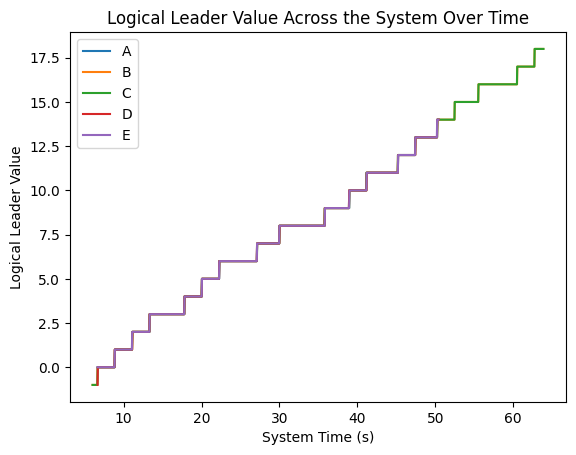

In [25]:
players = ["A", "B", "C", "D", "E"]

for player in players:
    xs, ys = get_player_data(player)
    plt.plot(xs, ys, label=player)

plt.xlabel("System Time (s)")
plt.ylabel("Logical Leader Value")
plt.title("Logical Leader Value Across the System Over Time")
plt.legend()

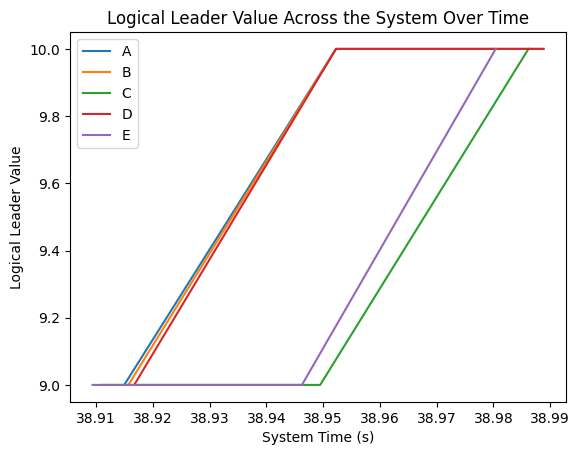

In [29]:
# Now zoom in on a particular window
for player in players:
    xs, ys = get_player_data(player, 38.9, 39)
    plt.plot(xs, ys, label=player)

plt.xlabel("System Time (s)")
plt.ylabel("Logical Leader Value")
plt.title("Logical Leader Value Across the System Over Time")
plt.legend()